Copyright **`(c)`** 2022 Giovanni Squillero `<squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  


In [1]:
from gx_utils import *

In [2]:
import logging
import random
from collections import deque, defaultdict
from itertools import combinations

logging.basicConfig(format="%(message)s", level=logging.INFO)

In [3]:
from matplotlib import pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

# Tree Search

## Problem

Given an array of positive integers, find the minimum number of elements that sum to a given number.

In [4]:
def elements2label(elements):
    return "-".join(str(_) for _ in sorted(elements))

In [5]:
def problem(array_length):
    random.seed(13)
    array = [random.randint(1, 20) for _ in range(array_length)]
    goal = sum(random.sample(array, array_length // 2))
    logging.info(f"{array} -> {goal}")

    graph = nx.Graph()
    labels = dict()
    for size in range(array_length + 1):
        for elements in combinations(array, size):
            node = tuple(sorted(elements))
            graph.add_node(node)
            labels[node] = elements2label(elements)

    for n1, n2 in combinations(graph.nodes, 2):
        s1 = Multiset(n1)
        s2 = Multiset(n2)
        if s2 > s1 and len(s2 - s1) == 1:
            graph.add_edge(n1, n2)

    plt.figure(figsize=(15, 9))
    # dot neato twopi circo fdp sfdp
    nx.draw(
        graph,
        pos=graphviz_layout(graph, prog="dot"),
        with_labels=True,
        labels=labels,
        node_color="lavender",
        node_size=1500,
    )

    return array, goal

## Tree Search

In [6]:
def tree_search(blocks, goal, strategy="bf", bound=False):
    tree = nx.DiGraph()
    frontier = deque()

    frontier.append(((), tuple(blocks)))

    n = 0
    while frontier:
        n += 1
        if strategy == "bf":
            state = frontier.popleft()
        elif strategy == "df":
            state = frontier.pop()
        else:
            assert False, "Unknown strategy"

        current_bag, available_blocks = state
        tree.add_node(state)
        tree.nodes[state]["color"] = "yellow"
        tree.nodes[state]["order"] = n

        if sum(current_bag) == goal:
            logging.info(f"Found a solution in {n:,} steps: {current_bag}")
            tree.nodes[state]["color"] = "lime"
            break
        elif bound and sum(current_bag) > goal:
            tree.nodes[state]["color"] = "red"
            continue

        tree.nodes[state]["color"] = "skyblue"
        for i, object in enumerate(available_blocks):
            new_state = (
                tuple((*current_bag, object)),
                tuple(available_blocks[:i] + available_blocks[i + 1 :]),
            )
            tree.add_node(new_state, color="lavender")
            tree.nodes[new_state]["label"] = elements2label(new_state[0])
            tree.add_edge(state, new_state, label=object)
            frontier.append(new_state)

    count = defaultdict(int)
    for n in tree.nodes:
        count[tuple(sorted(n[0]))] += 1
    for n in tree.nodes:
        tree.nodes[n]["count"] = count[tuple(sorted(n[0]))]

    tree.nodes[((), tuple(blocks))]["color"] = "lime"
    tree.nodes[((), tuple(blocks))]["label"] = "*"
    return tree

[9, 10, 6, 8, 5] -> 15


Found a solution in 8 steps: (9, 6)


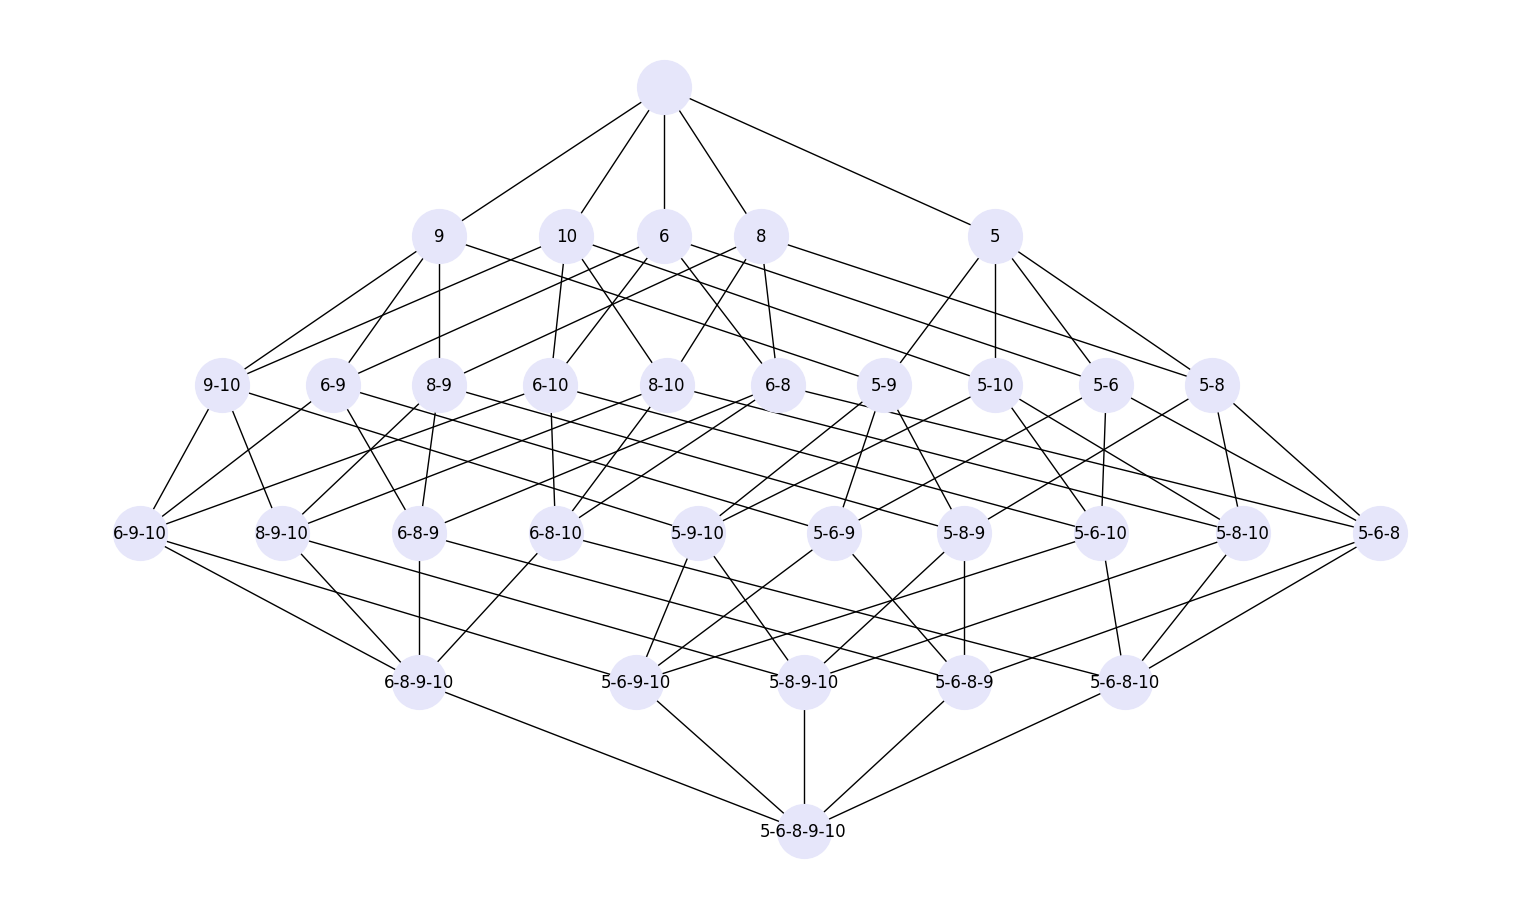

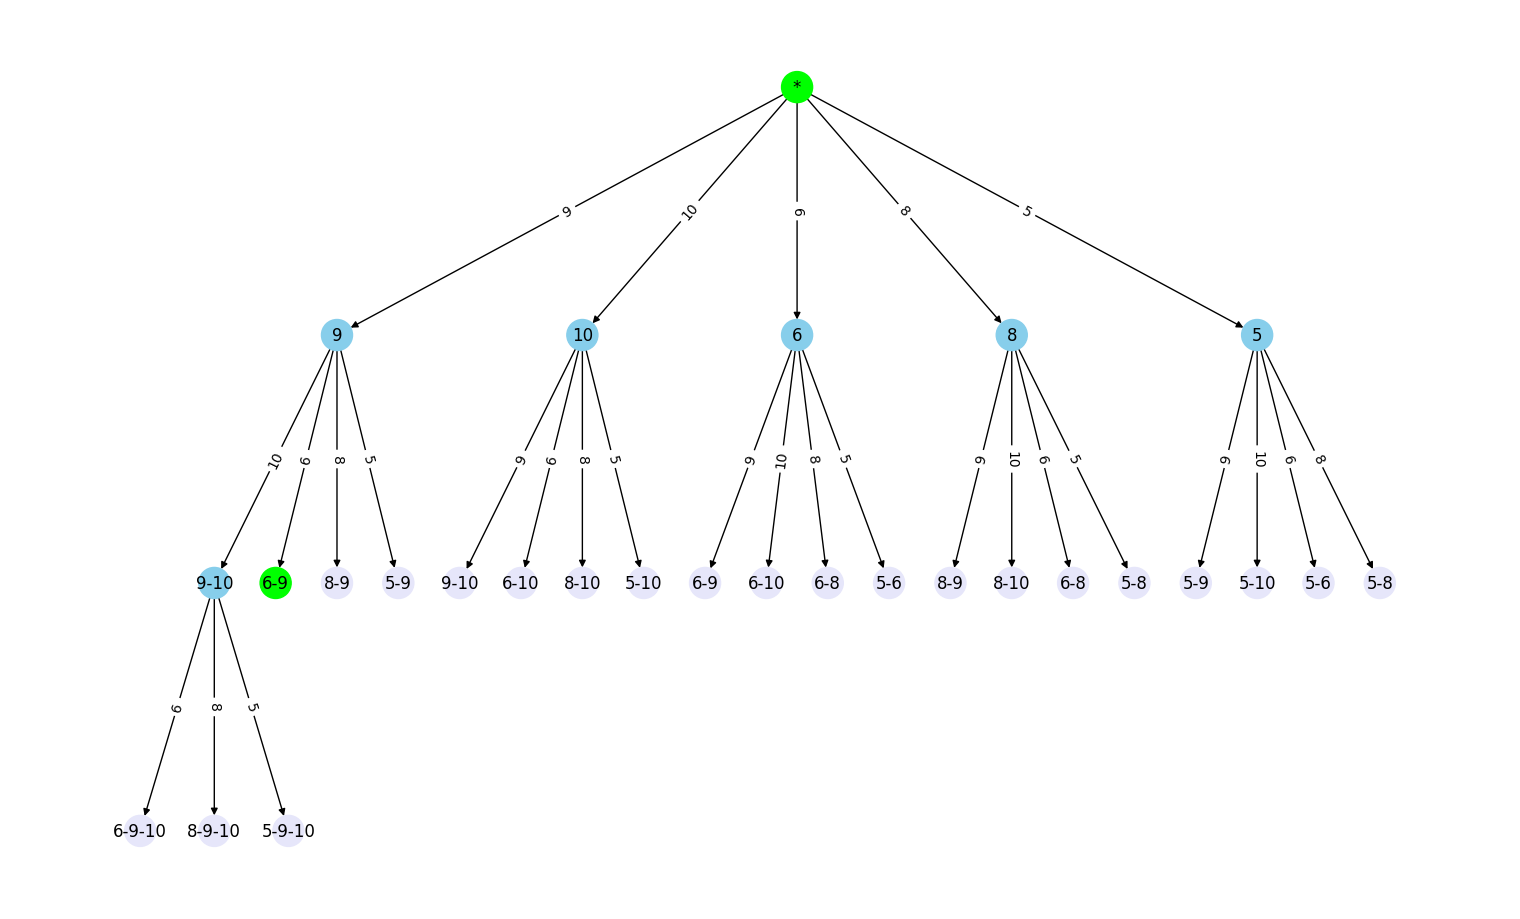

In [7]:
array, goal = problem(5)
tree = tree_search(array, goal)

plt.figure(figsize=(15, 9))
pos = graphviz_layout(tree, prog="dot")  # dot neato twopi circo fdp sfdp
nx.draw(
    tree,
    pos=pos,
    node_color=[c for _, c in tree.nodes(data="color")],
    with_labels=True,
    labels={n: l for n, l in tree.nodes.data("label")},
    node_size=500,
)
nx.draw_networkx_edge_labels(tree, pos=pos, edge_labels=nx.get_edge_attributes(tree, "label"))
None

[9, 10, 6, 8, 5, 8] -> 23


Found a solution in 36 steps: (8, 5, 10)


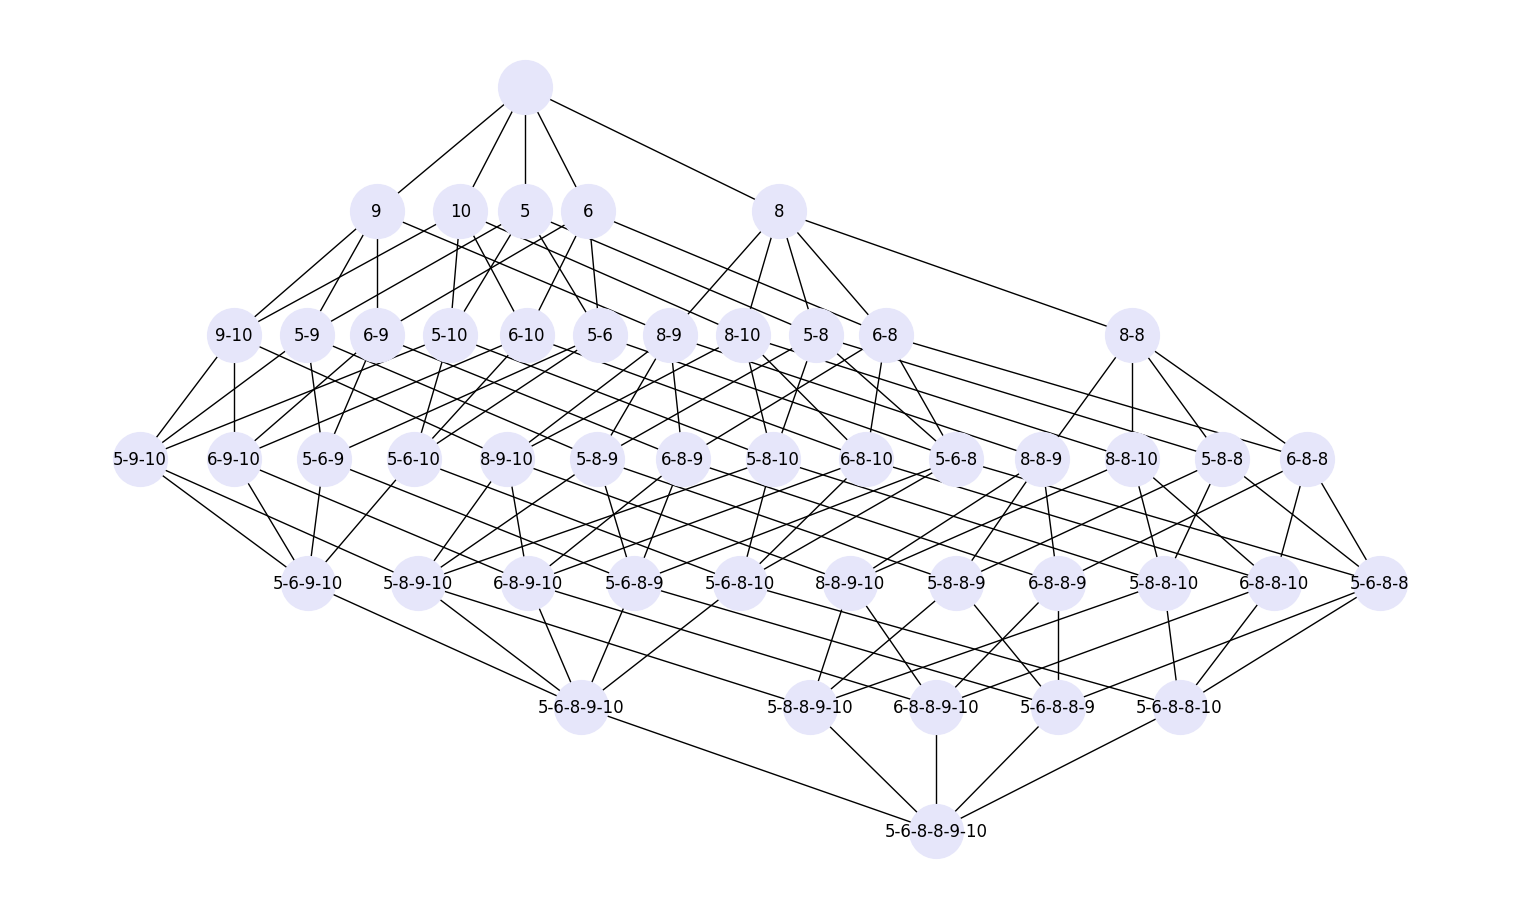

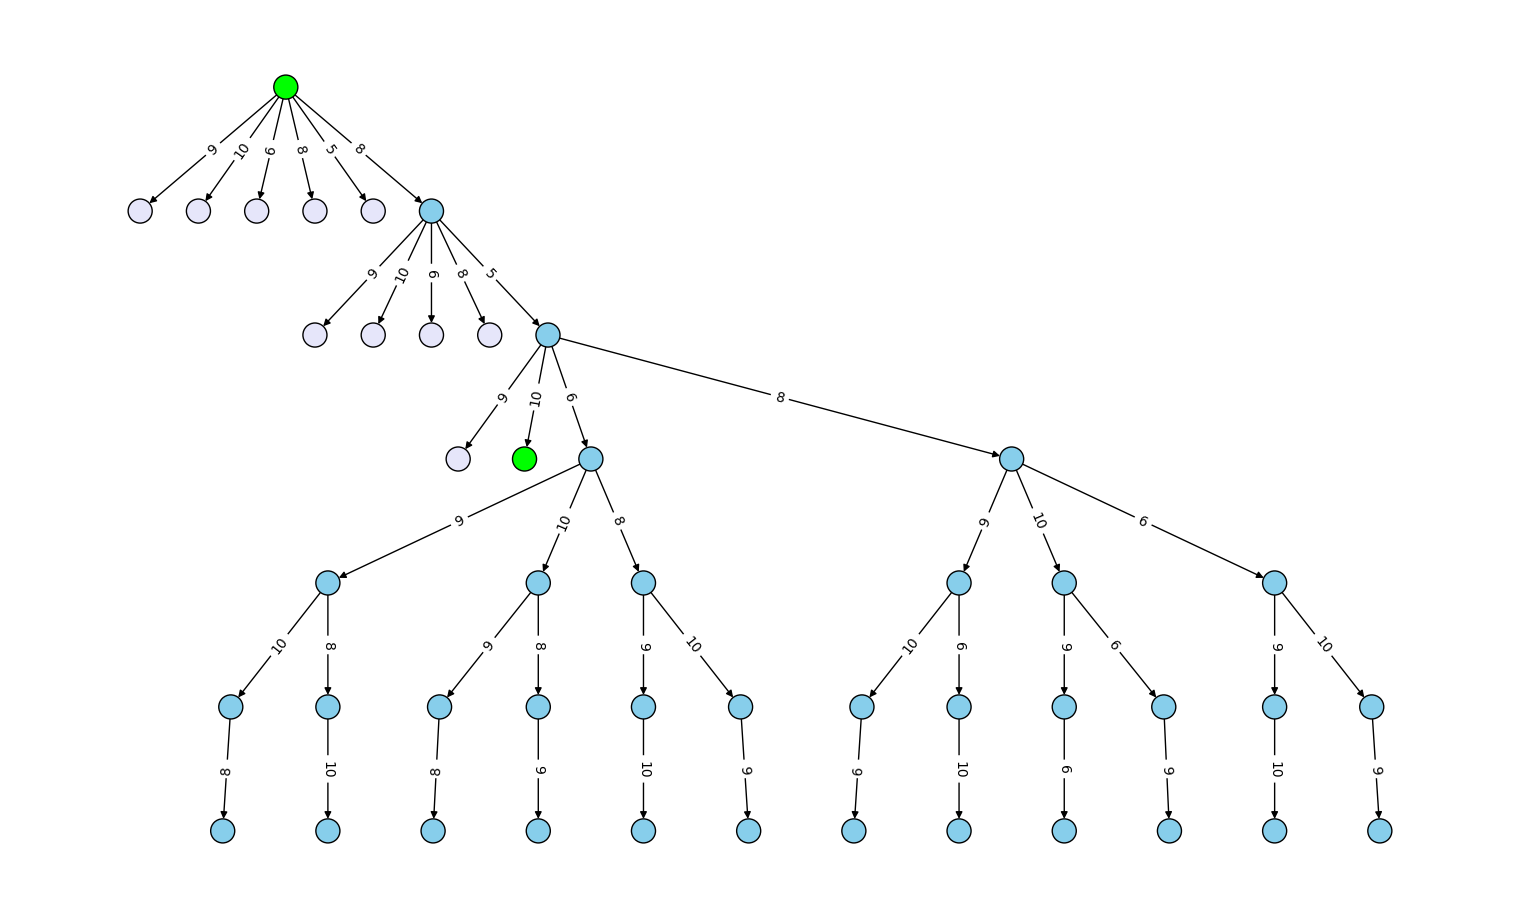

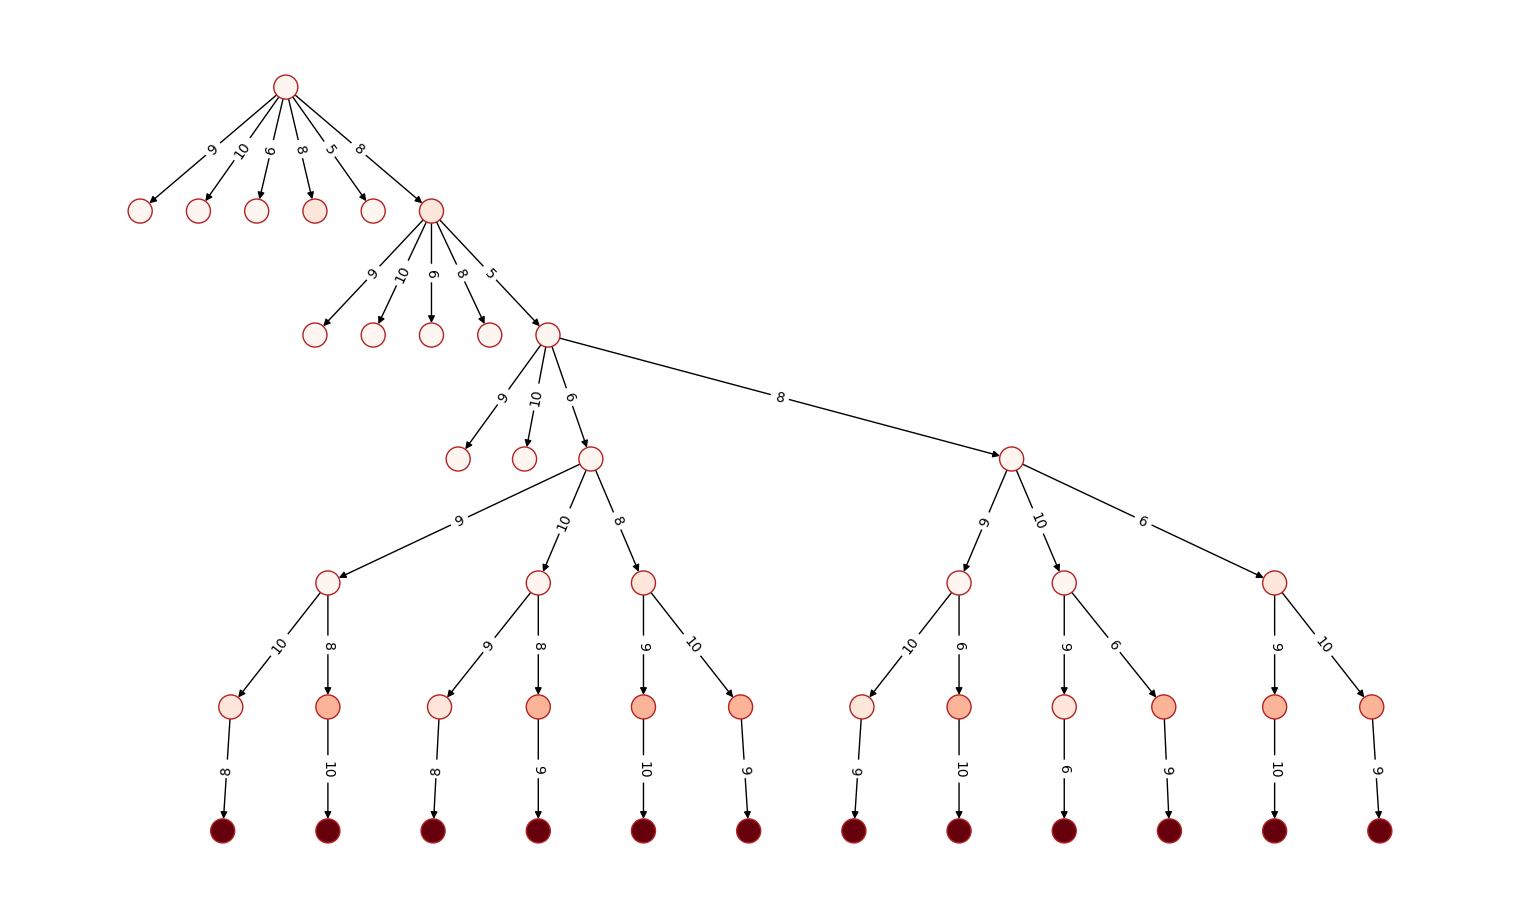

In [8]:
array, goal = problem(6)
tree = tree_search(array, goal, strategy="df")

# plt.figure(figsize=(20, 12))
plt.figure(figsize=(15, 9))
pos = graphviz_layout(tree, prog="dot")  # dot neato twopi circo fdp sfdp
nx.draw(
    tree,
    pos=pos,
    node_color=[c for _, c in tree.nodes(data="color")],
    with_labels=False,
    linewidths=1,
    edgecolors="black",
)
nx.draw_networkx_edge_labels(tree, pos=pos, edge_labels=nx.get_edge_attributes(tree, "label"))
None

plt.figure(figsize=(15, 9))
nx.draw(
    tree,
    pos=pos,
    node_color=[c for _, c in tree.nodes(data="count")],
    cmap=plt.cm.Reds,
    with_labels=False,
    linewidths=1,
    edgecolors="firebrick",
)
nx.draw_networkx_edge_labels(tree, pos=pos, edge_labels=nx.get_edge_attributes(tree, "label"))
None

Found a solution in 12 steps: (8, 5, 10)


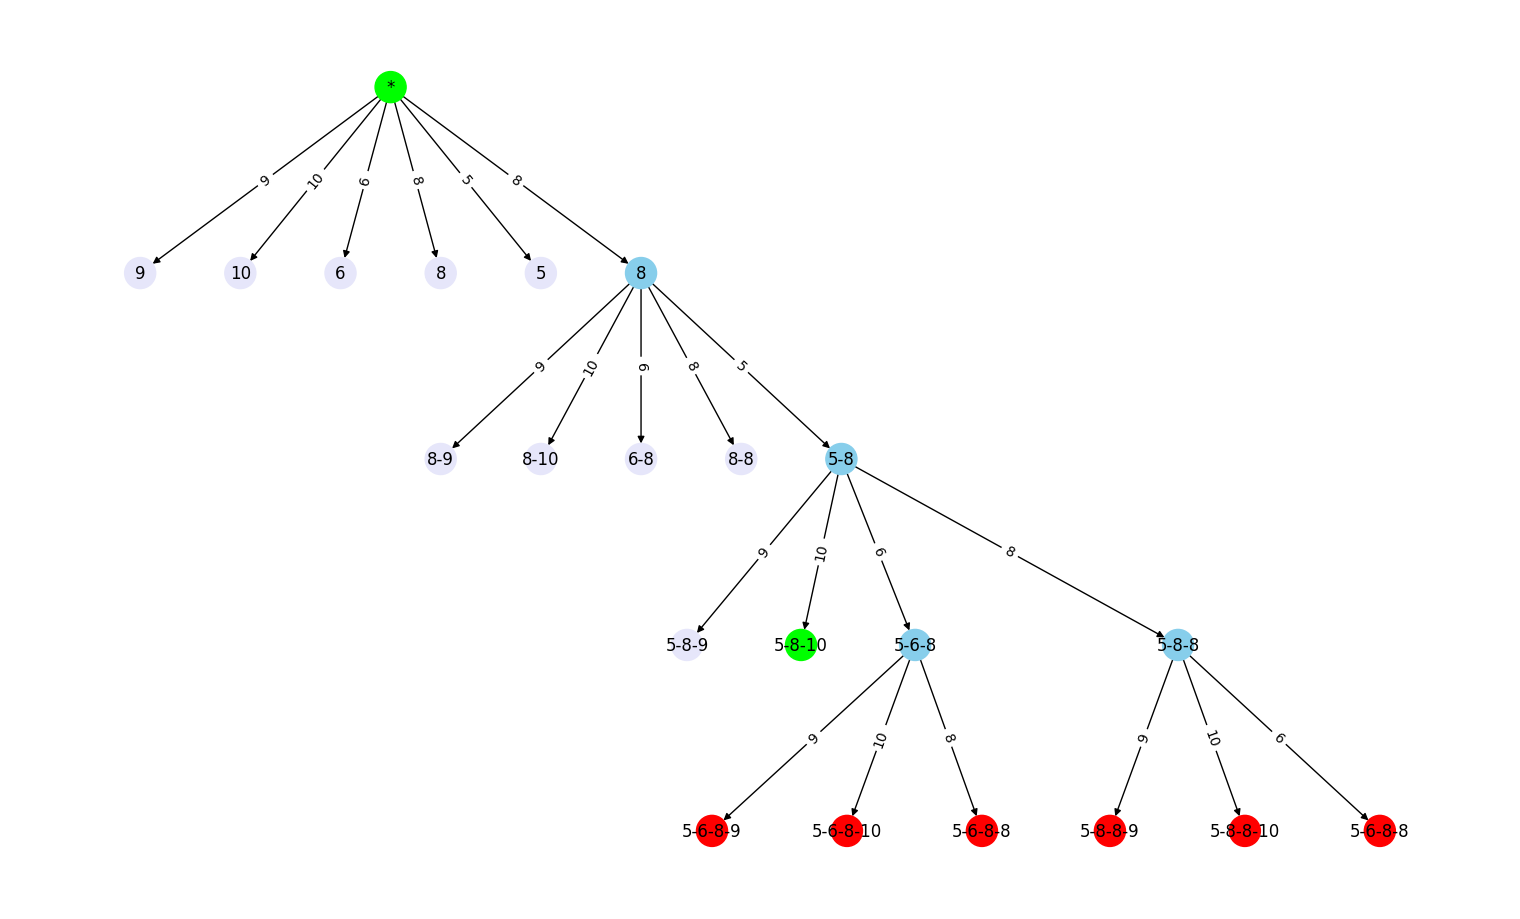

In [9]:
tree = tree_search(array, goal, strategy="df", bound=True)

plt.figure(figsize=(15, 9))
pos = graphviz_layout(tree, prog="dot")  # dot neato twopi circo fdp sfdp
nx.draw(
    tree,
    pos=pos,
    node_color=[c for _, c in tree.nodes(data="color")],
    with_labels=True,
    labels={n: l for n, l in tree.nodes.data("label")},
    node_size=500,
)
nx.draw_networkx_edge_labels(tree, pos=pos, edge_labels=nx.get_edge_attributes(tree, "label"))
None